In [ ]:
!pip install qiskit-ibm-catalog qiskit_serverless

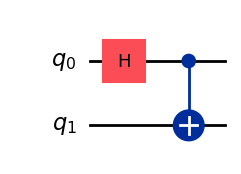

In [3]:

from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator

# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.quantum_info import SparsePauliOp

# Replace 'YOUR_API_KEY' with your actual IBM Quantum API key
API_KEY = ''

try:
    # Initialize the Qiskit Runtime Service with your API key
    service = QiskitRuntimeService(channel="ibm_quantum", token=API_KEY)
    
    # Get available backends
    backends = service.backends()
    print("Available backends:", [backend.name for backend in backends])
    
    # Select a backend that's least busy
    backend = service.least_busy(min_num_qubits=2)
    print(f"Least busy backend: {backend.name}")
    
    # Create an estimator instance with specific options
    options = {
        'optimization_level': 1,
        'resilience_level': 1
    }
    estimator = Estimator(session=backend, options=options)
    
    # Create observable for measurement (Z on first qubit, I on second)
    observable = SparsePauliOp('ZI')
    
    # Run the circuit with shots specification
    job = estimator.run(
        circuits=[qc],
        observables=[observable],
        shots=1000
    )
    
    # Get and print results
    result = job.result()
    print(f"\nResults from {backend.name} backend:")
    print(f"Expectation value: {result.values[0]}")
    print(f"Metadata: {result.metadata}")

except Exception as e:
    print("Error occurred during execution:")
    print(str(e))


Available backends: ['ibm_brisbane', 'ibm_kyiv', 'ibm_sherbrooke']
Least busy backend: ibm_brisbane
Error occurred during execution:
EstimatorV2.__init__() got an unexpected keyword argument 'session'


In [5]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Operator
from qiskit_ibm_runtime import Estimator
import numpy as np

# Initialize quantum circuit with 3 qubits
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

# Create a 3D rotation matrix (as an example using Pauli matrices)
def create_3d_matrix():
    # Creating 8x8 matrix for 3 qubits
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    
    # Tensor product to create 3D operation
    matrix_3d = np.kron(np.kron(X, Y), Z)
    return matrix_3d

# Create the 3D matrix
matrix_3d = create_3d_matrix()

# Convert to Qiskit operator
operator_3d = Operator(matrix_3d)

# Apply the custom operation to the circuit
qc.unitary(operator_3d, [0,1,2], label='3D_Op')

# Add measurements
qc.measure(qr, cr)

try:
    # Initialize the Qiskit Runtime Service
    service = QiskitRuntimeService(channel="ibm_quantum", token=API_KEY)
    
    # Get a backend with at least 3 qubits
    backend = service.least_busy(min_num_qubits=3)
    print(f"Using backend: {backend.name}")
    
    # Create estimator
    options = {
        'optimization_level': 1,
        'resilience_level': 1
    }
    estimator = Estimator(session=backend, options=options)
    
    # Create observable for 3D measurement
    observable = SparsePauliOp('ZZZ')
    
    # Run the circuit
    job = estimator.run(
        circuits=[qc],
        observables=[observable],
        shots=1000
    )
    
    # Get results
    result = job.result()
    print("\nResults of 3D matrix operation:")
    print(f"Expectation value: {result.values[0]}")
    print(f"Matrix shape: {matrix_3d.shape}")
    print(f"Circuit depth: {qc.depth()}")
    
except Exception as e:
    print("Error in 3D matrix computation:")
    print(str(e))


Using backend: ibm_brisbane
Error in 3D matrix computation:
EstimatorV2.__init__() got an unexpected keyword argument 'session'


In [1]:
from qiskit_serverless import IBMServerlessClient
from qiskit_ibm_catalog import QiskitFunctionsCatalog
 
# authentication
client = IBMServerlessClient(token="4cff0309af4fd050ede15a12ccc6e65b58d050f43e1bccc2dc5e812058b1004b88128c1ccbbc3faa1c6cb9dfce90a3a45be348a1eb4381d4ed413033e38f117c")
catalog = QiskitFunctionsCatalog(token="4cff0309af4fd050ede15a12ccc6e65b58d050f43e1bccc2dc5e812058b1004b88128c1ccbbc3faa1c6cb9dfce90a3a45be348a1eb4381d4ed413033e38f117c")
 
# load function
singularity = catalog.load("multiverse/singularity")

QiskitServerlessException: Cannot verify token.